<a href="https://colab.research.google.com/github/GlenLuiz/IA/blob/master/Plataformas_Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurações

In [1]:
pip install --upgrade "ibm-watson>=5.3.0"


     |████████████████████████████████| 412 kB 7.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 68 kB 8.2 MB/s 
     |████████████████████████████████| 49 kB 7.3 MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-5.3.0-py3-none-any.whl size=408872 sha256=af0fbb1b16c122d8103ccbda464b6758c92c02aecc3e2bb3119030b63182ba94
  Stored in directory: /root/.cache/pip/wheels/21/d9/82/4ce5b94730bc4f1f7b4c6384f72964b9b8f79fcc125bb8085c
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.13.0-py3-none-any.whl size=83058 sha256=1dabc2448b2f423dd24eb6e39d6fb822bf20b97a984c20ea30befd5295dd82f8
  Stored in directory: /root/.cache/pip/wheels/35/75/1c/6c9efd20e2ae82dcd6bf046b1268b06b48d70d5f3301a0495d
Successfully built ibm-watson ibm-cloud-sdk-core


Imports de Pacotes

In [4]:
from IPython.display import display, Javascript
from IPython.display import Image
from google.colab.output import eval_js
from base64 import b64decode

Funções úteis

In [5]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Informações do cliente

In [ ]:
#@title Preencha aqui com as informações do cliente requisitante

#@markdown Informe todos os campos a seguir:
nome = "Informe aqui o nome" #@param {type:"string"}

renda = 1000.00 #@param {type:"number"}
idade = 18 #@param {type:"slider", min:18, max:100, step:1}
etnia = "Selecionar etnia"  #@param ["Selecionar etnia", "Etnia01", "Etnia02"]
genero = "Feminino" #@param ["Masculino", "Feminino"]
casa_propria = "Selecionar" #@param ["Selecionar", "Sim", "Não"]
outras_rendas = "Selecionar" #@param ["Selecionar", "Sim", "Não"]
estado_civil = "Selecionar" #@param ["Selecionar", "Estado01", "Estado02"]
escolaridade = 1 #@param {type:"slider", min:0, max:3, step:1}

#@markdown ---


<IPython.core.display.Javascript object>

Saved to photo.jpg


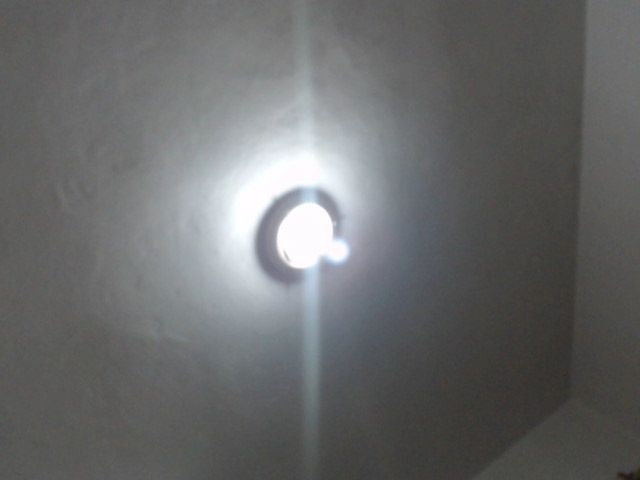

In [37]:
#@title Tire uma foto do cliente requerente (ou tire uma foto sua mesmo)

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Análise de crédito

1. Verifique se na imagem possui uma pessoa, utilizando a API "default" da IBM; Se não possuir, informar mensagem e não conceder o empréstimo.


2.  Verifique se a imagem apresenta conteúdo explícito , utilizando a API "explicit"da IBM; Se possuir, informar mensagem e não conceder o empréstimo.  


3. Verificar o gênero e a idade da pessoa utilizando a API de reconhecimento facial da Microsoft Azure; Se não for o mesmo gênero ou se a idade diferir em 5 anos (para mais ou para menos), informar mensagem e não conceder o empréstimo.


4. Exibir a imagem novamente no notebook com os pontos "fiduciais" da face da pessoa, obtidos pela API da Azure. (em uma aplicação corporativa, estes pontos ficam gravados para futuras autenticações)


5. Chamar a API de Machine Learning em um contêiner feito em Docker e que esteja rodando em uma máquina virtual no Google Cloud. Esta API deve usar os dados informados neste notebook e **automaticamente** vetar ou conceder o empréstimo.


ATENÇÃO PARA O BULLET 5: É necessário chamar tanto um modelo que possua a variável ETNIA quanto um modelo que não possui esta variável, assim como fizemos em aula!!!


6. Gravar um vídeo "operando" o notebook e simulando a avaliação com concessão ou reprovação do crédito.


7. Submeter o Notebook e o vídeo da plataforma da FIAP, se o vídeo ficar muito grande, submeter ao Youtube (pode ser privado) e anexar o Link.

---  
(Dica: Você pode usar este vídeo para divulgar seu trabalho como Engenheiro de ML)


In [38]:
import json
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('w1A5-rYXDKvH-hYHZk0ulRlcRYuuDJuK5kJM8WrVXm9e')
visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    authenticator=authenticator
)

visual_recognition.set_service_url('https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/742a87e4-6844-4973-98f3-f0c3d8ad895b')

with open('./photo.jpg', 'rb') as images_file:
    classes_person = visual_recognition.classify(images_file=images_file,classifier_ids=["explicit", "default"]).get_result()
    print(json.dumps(classes, indent=2))


# with open('./photo.jpg', 'rb') as images_file:
#     classes_expl = visual_recognition.classify(images_file=images_file, classifier_ids=["explicit"]).get_result()
#     print(json.dumps(classes, indent=2))

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "explicit",
          "name": "explicit",
          "classes": [
            {
              "class": "not explicit",
              "score": 0.985
            }
          ]
        }
      ],
      "image": "photo.jpg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 0
}


In [39]:
result_json = json.dumps(classes, indent=2)

Contem_pessoa = False
Contem_contExp = False


for imagem in classes_person["images"]:
  for classifier in imagem["classifiers"]:
      for image_class in classifier["classes"]:
        if (image_class["class"] == "explicit"):
          Contem_contExp = True
        elif(image_class["class"] == "person" and image_class["score"] > 0.5):
          Contem_pessoa = True
          break

print(Contem_pessoa)
print(Contem_contExp)

False
False
